In [1]:
import numpy as np
from sklearn.datasets import load_diabetes
import plotly.express as px

In [2]:
def compute_cost(W,X,y):
    m=X.shape[0]
    y_pred = np.dot(X,W) 
    cost=(1/(2*m))*np.sum(((y_pred-y)**2))
    return cost

In [3]:
def update_parameters(W,X,learning_rate=0.01):
    y_pred = np.dot(X,W)
    diff=(y_pred-y)
    m=X.shape[0]
    dW=(1/m)*np.dot(X.T,diff)
    W_new = W-(learning_rate)*dW
    return W_new

In [4]:
def gradient_descent(W,X,y,threshold=0.0001,num_iters=1000,learning_rate=0.01):
    assert(X.shape[0]==y.shape[0])
    J_history=[]
    i=0
    change=1
    cost=float('inf')
    while i<num_iters and change>threshold:
        cost_prev=cost
        cost=compute_cost(W,X,y)
        change=cost_prev-cost
        W=update_parameters(W,X,learning_rate=learning_rate)
        J_history.append(cost)
        i+=1
    return J_history, W

In [5]:
def predict(W,X):
    if X.shape[0]!=W.shape[0]:
        X=np.c_[X,np.ones((X.shape[0]),1)]
    pred=np.dot(W.T,X)
    return pred

In [6]:
from sklearn.datasets import load_diabetes,load_boston,fetch_california_housing,make_regression
import numpy as np
from sklearn import preprocessing

X,y=load_diabetes(return_X_y=True)
y=y.reshape(len(y),1)
X=preprocessing.scale(X)
X=np.c_[np.ones((X.shape[0],1)),X]
print(f"New shape of X: {X.shape}")
print(f"Number of samples in our dataset: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")

New shape of X: (442, 11)
Number of samples in our dataset: 442
Number of features: 11


In [7]:
iters=1500
learning_rate=0.01

W=np.random.rand(X.shape[1],1) #initialize random weights 

print(f'Initial Cost: {compute_cost(W,X,y)}')

J_history, weights = gradient_descent(W,X,y,num_iters=iters,learning_rate=learning_rate) #perform gradient descent

print(f'Final cost: {J_history[-1]}') #print final cost
print(f'Final weights: {weights}') #print final weights

Initial Cost: 14384.88507503585
Final cost: 1438.4745688054995
Final weights: [[152.13344113]
 [ -0.32135242]
 [-11.24724373]
 [ 25.14066498]
 [ 15.31624894]
 [ -5.94595599]
 [ -2.93078952]
 [ -8.88554613]
 [  5.20804054]
 [ 23.6833972 ]
 [  3.31927165]]


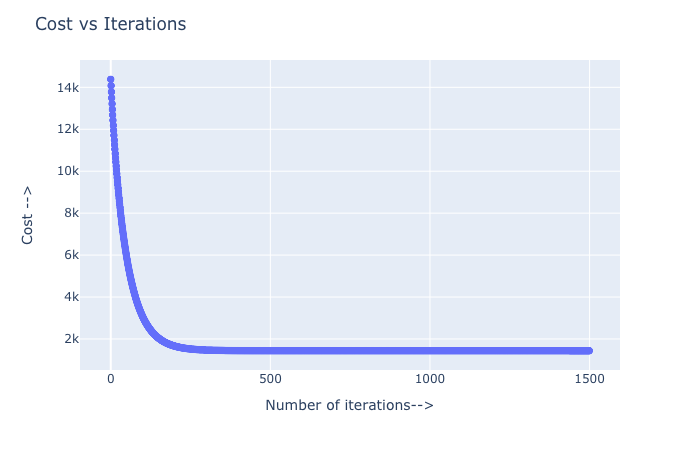

In [8]:
def plot_descent(J_history):
    fig=px.scatter(x=range(len(J_history)),y=J_history)
    fig.update_layout(title='Cost vs Iterations',
                      xaxis_title='Number of iterations-->',
                      yaxis_title='Cost -->')
    fig.show('png') #png for visibility in GitHub
  
plot_descent(J_history)

It took 17198 iterations to converge
Final cost: 1430.4291134032862


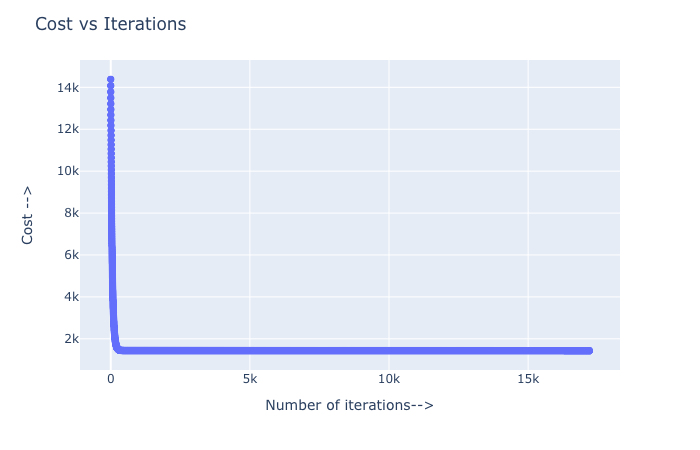

In [9]:
J_history, weights = gradient_descent(W,X,y,num_iters=float('inf'),learning_rate=learning_rate) #perform gradient descent
print(f'It took {len(J_history)} iterations to converge')
print(f'Final cost: {J_history[-1]}')
plot_descent(J_history) #till convergence

In [10]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression(fit_intercept=False)
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [11]:
weights=weights.reshape(lr.coef_.shape) #transforming to same shape as lr.coef_

In [12]:
rmse = (np.sqrt(np.sum((weights-lr.coef_)**2)))
print(f'RMSE of weights of two models: {rmse}')

RMSE of weights of two models: 11.67890014590802
